<a href="https://colab.research.google.com/github/FThameema/Burgers-equation/blob/main/2D_cavity_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

print(" 2D Cavity Flow - Lid-Driven Cavity")

 2D Cavity Flow - Lid-Driven Cavity


In [ ]:
# Simulation Parameters
# Domain and grid
Lx, Ly = 1.0, 1.0           # Domain size
Nx, Ny = 81, 81              # Grid points,
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

# Fluid properties
Re = 100                  # Reynolds number
nu = 0.01                  # Kinematic viscosity
U_lid = 1.0                # Lid velocity

# Simulation parameters
dt = 0.001                  # Time step
T_total = 10.0               # Total simulation time
Nt = int(T_total / dt)      # Number of time steps

# Stability check
cfl_u = U_lid * dt / dx
cfl_nu = nu * dt / (dx**2)
print(f"Simulation Parameters:")
print(f" Grid: {Nx} x {Ny} points")
print(f" Reynolds number: Re = {Re}")
print(f" CFL conditions: U={cfl_u:.3f}, ν={cfl_nu:.3f}")
print(f"(Both should be < 1 for stability)")

# Create grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initialize velocity fields (u, v) and pressure (p)
u = np.zeros((Ny, Nx))       # x-velocity
v = np.zeros((Ny, Nx))      # y-velocity
p = np.zeros((Ny, Nx))      # pressure

print(" Grid and fields initialized")

Simulation Parameters:
 Grid: 81 x 81 points
 Reynolds number: Re = 100
 CFL conditions: U=0.080, ν=0.064
(Both should be < 1 for stability)
 Grid and fields initialized


In [ ]:
# Cavity Flow Solver.
def solve_cavity():
    print("starting simulations")
    # Smaller grid for speed
    Nx, Ny = 41, 41
    Lx, Ly = 1.0, 1.0
    dx = Lx / (Nx - 1)
    dy = Ly / (Ny - 1)

    # Parameters
    Re = 100
    U_lid = 1.0
    nu = 1.0 / Re
    dt = 0.001
    total_time = 2.0  # Reduced time
    Nt = int(total_time / dt)

    # Initialize fields
    u = np.zeros((Ny, Nx))
    v = np.zeros((Ny, Nx))

    print("Starting simulation...")
    print(f"Grid: {Nx} x {Ny} (optimized for speed simulations)")

    # Storage for results
    u_history = []
    v_history = []

    start_time = time.time()

    for n in range(Nt):
        u_new = u.copy()
        v_new = v.copy()

        # Boundary conditions
        u_new[-1, :] = U_lid  # Moving lid
        u_new[0, :] = 0.0     # Bottom
        u_new[:, 0] = 0.0      # Left
        u_new[:, -1] = 0.0    # Right
        v_new[-1, :] = 0.0
        v_new[0, :] = 0.0
        v_new[:, 0] = 0.0
        v_new[:, -1] = 0.0

        # Update interior (vectorized)
        for i in range(1, Ny-1):
            for j in range(1, Nx-1):
                # Convection
                if u[i, j] >= 0:
                    conv_u_x = u[i, j] * (u[i, j] - u[i, j-1]) / dx
                else:
                    conv_u_x = u[i, j] * (u[i, j+1] - u[i, j]) / dx

                if v[i, j] >= 0:
                    conv_u_y = v[i, j] * (u[i, j] - u[i-1, j]) / dy
                else:
                    conv_u_y = v[i, j] * (u[i+1, j] - u[i, j]) / dy

                # Diffusion
                diff_u = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / (dx**2) + \
                         (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / (dy**2)

                # Update
                u_new[i, j] = u[i, j] + dt * (-conv_u_x - conv_u_y + nu * diff_u)

                # for v
                if u[i, j] >= 0:
                    conv_v_x = u[i, j] * (v[i, j] - v[i, j-1]) / dx
                else:
                    conv_v_x = u[i, j] * (v[i, j+1] - v[i, j]) / dx

                if v[i, j] >= 0:
                    conv_v_y = v[i, j] * (v[i, j] - v[i-1, j]) / dy
                else:
                    conv_v_y = v[i, j] * (v[i+1, j] - v[i, j]) / dy

                diff_v = (v[i, j+1] - 2*v[i, j] + v[i, j-1]) / (dx**2) + \
                         (v[i+1, j] - 2*v[i, j] + v[i-1, j]) / (dy**2)

                v_new[i, j] = v[i, j] + dt * (-conv_v_x - conv_v_y + nu * diff_v)

        u, v = u_new, v_new

        # Store every 100 steps
        if n % 100 == 0:
            u_history.append(u.copy())
            v_history.append(v.copy())

        # Progress update
        if n % 1000 == 0:
            progress = n / Nt * 100
            print(f"   Progress: {progress:.1f}%")

    end_time = time.time()
    print(f" Simulation complete! Time: {end_time - start_time:.1f}s")

    return u_history, v_history, Nx, Ny, Lx, Ly

# Run the optimized simulation
u_history, v_history, Nx, Ny, Lx, Ly = solve_cavity()

starting simulations
Starting simulation...
Grid: 41 x 41 (optimized for speed simulations)
   Progress: 0.0%
   Progress: 50.0%
 Simulation complete! Time: 28.8s


Creating visualizations from simulation data...


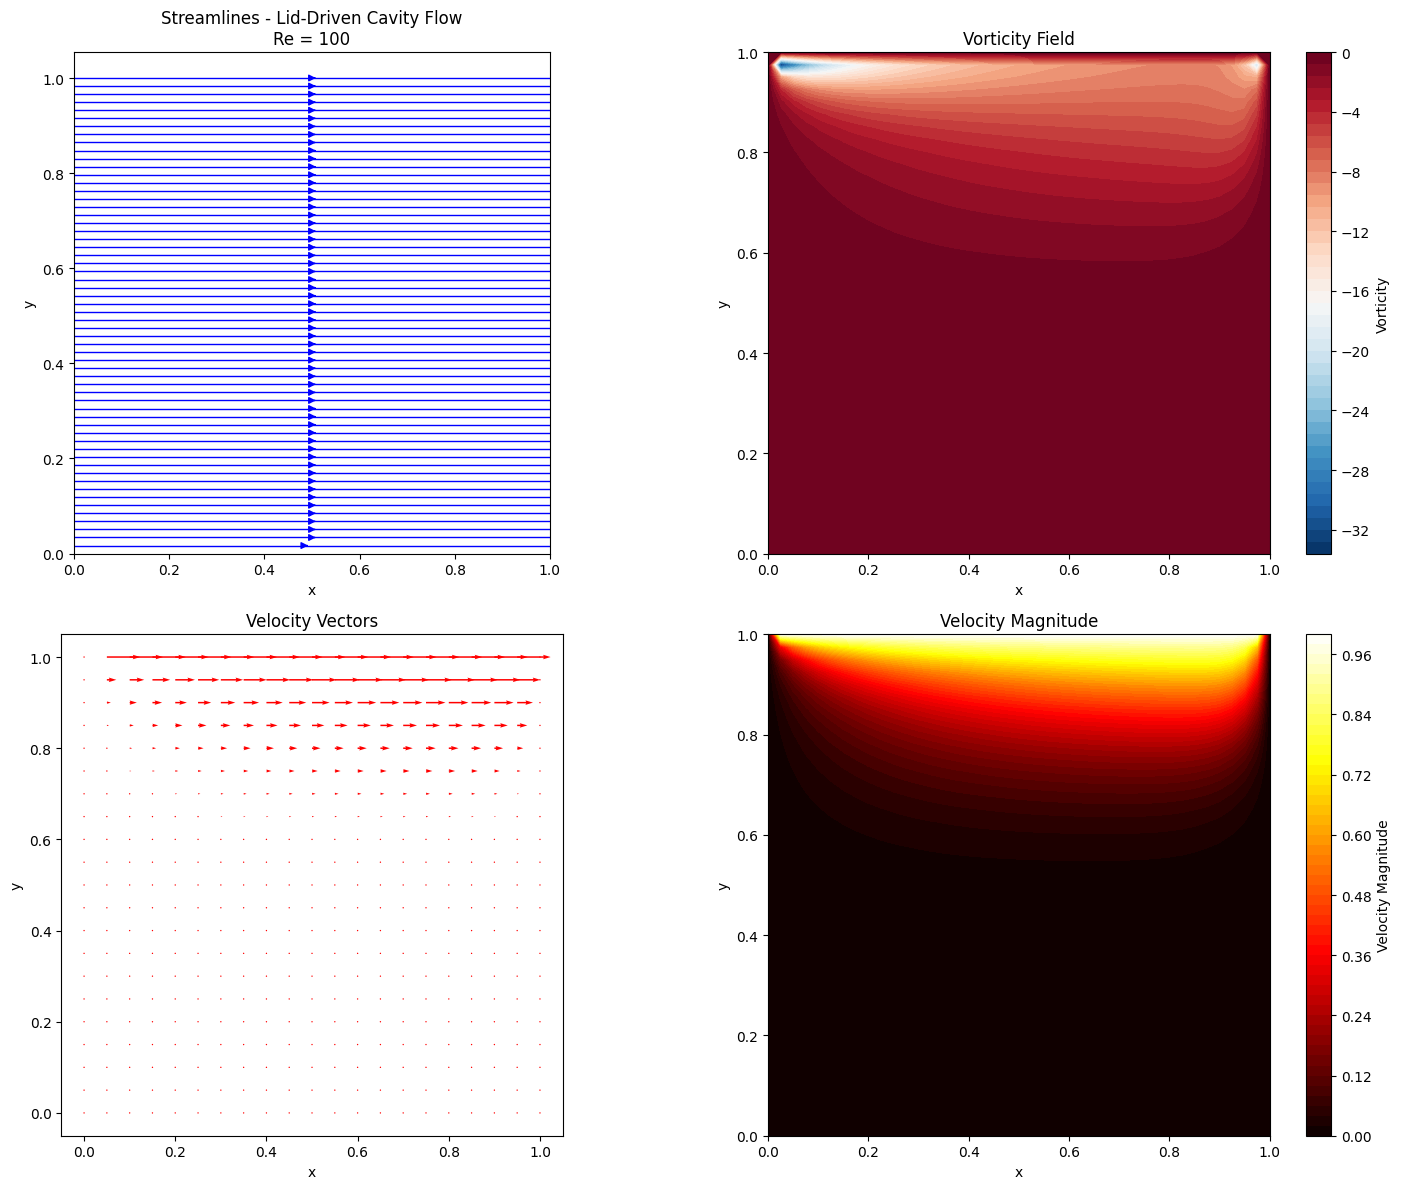

In [ ]:
print("Creating visualizations from simulation data...")

# Create grid from simulation
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Use the last frame from the working simulation
u_final = u_history[-1]
v_final = v_history[-1]

# Calculate derived quantities
vorticity = np.zeros((Ny, Nx))
for i in range(1, Ny-1):
    for j in range(1, Nx-1):
        vorticity[i, j] = (v_final[i, j+1] - v_final[i, j-1]) / (2*dx) - (u_final[i+1, j] - u_final[i-1, j]) / (2*dy)

velocity_magnitude = np.sqrt(u_final**2 + v_final**2)

# Create professional plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Streamlines
ax = axes[0, 0]
streamplot = ax.streamplot(X, Y, u_final, v_final, density=2, color='blue', linewidth=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Streamlines - Lid-Driven Cavity Flow\nRe = 100')
ax.set_aspect('equal')

# Plot 2: Vorticity
ax = axes[0, 1]
contour = ax.contourf(X, Y, vorticity, levels=50, cmap='RdBu_r')
plt.colorbar(contour, ax=ax, label='Vorticity')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vorticity Field')
ax.set_aspect('equal')

# Plot 3: Velocity vectors
ax = axes[1, 0]
skip = 2  # Plot every 2nd vector for clarity
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip],
          u_final[::skip, ::skip], v_final[::skip, ::skip],
          scale=15, color='red', width=0.003)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Velocity Vectors')
ax.set_aspect('equal')

# Plot 4: Velocity magnitude
ax = axes[1, 1]
vel_plot = ax.contourf(X, Y, velocity_magnitude, levels=50, cmap='hot')
plt.colorbar(vel_plot, ax=ax, label='Velocity Magnitude')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Velocity Magnitude')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()